In [1]:
import numpy as np
import pandas as pd
from scipy import io
from scipy.stats import ranksums
from entropy.MDE.MDE import MDE
from entropy.MCRDE.MCRDE import MCRDE
from entropy.MFDE.MFDE import MFDE
from utils.plot_Entropy import plot_Entropy
from utils.write_txt import write_txt
import matplotlib.pyplot as plt 

# Multiscale Entropy method

* ### MDE : Multiscale Dispersion Entropy

   | 파라미터 | 설명 | 예시 |
   |:--------|:-------|:--------|
   | N | 데이터의 길이 |  N=1000이면 데이터 x의 인자의 수가 1000 |
   | m | 분산 패턴 (Dispersion pattern) 인자의 수 | 분산 패턴이 (1,3,3) 일 때, m=3 |
   | c | 분산 패턴에 맵핑되는 인자의 클래스 (c>=1, c 는 정수) | c=3 일 때, 분산 패턴의 인자는 1이상 3이하의 정수 |
   | tau | 원래의 신호를 맵핑하는 간격 | tau=2 일 때, 원래의 신호 {1,5,6,7,10}에서 {1,6,7}이 맵핑됨 |
   | scale | 데이터를 묶는 단위, multiscale entropy 계산을 위해서 필요 | scale=2 일 때, 원래의 신호 {1,2,5,6,10,12} -> 새로운 신호 {2.5,5.5,11} |
   

* ### MCRDE : Multiscale Cumulative Residual Dispersion Entropy 
    * 파라미터는 MDE와 동일

* ### MFDE : Multiscale Fuzzy Dispersion Entropy
    * 파라미터는 MDE와 동일

### Entropy method option

In [2]:
# 사용하고자 하는 Multiscale Entropy 기법을 입력 (ex. 'MDE', 'MCRDE', 'MFDE')
Entropy_method = 'MDE'

### parameters of each Entropy method

In [3]:
# dict 자료형의 key는 method의 string (name), value는 method (function) 로 구성됨 
Entropy_dict = {'MDE':MDE, 'MCRDE':MCRDE, 'MFDE':MFDE }

# Multiscale Entropy parameter

# MDE paramter
if Entropy_method == 'MDE':
    N = 1000  # RRIs data length (default:1000)
    m = 3    # embedding dimension (default:3)
    c = 6    # number of class (default:6)
    tau = 1   # delay factor (default:1)
    scale = 25   # number of scale factors (default:25)
    params_dict = { 'N':N,'m':m,'c':c,'tau':tau,'scale':scale }      # MDE parameter (type:dict)
    
# MCRDE paramter
elif Entropy_method == 'MCRDE':
    N = 1000   # RRIs data length (default:1000)
    m = 3   # embedding dimension (default:3)
    c = 6  # number of class (default:6)
    tau = 1    # delay factor (default:1)
    scale = 25    # number of scale factors (default:25)
    params_dict = { 'N':N,'m':m,'c':c,'tau':tau,'scale':scale }      # MCRDE parameter (type:dict)
    
# MFDE paramter
elif Entropy_method == 'MFDE':
    N = 1000   # RRIs data length (default:1000)
    m = 4    # embedding dimension (default:4)
    c = 4    # number of class (default:4)
    tau = 1   # delay factor (default:1)
    scale = 25   # number of scale factors (default:25)
    params_dict = { 'N':N,'m':m,'c':c,'tau':tau,'scale':scale }      # MFDE parameter (type:dict)
    

# Data Preparation

In [4]:
dataFlag ="data1"
if dataFlag =="data1":
    # 심부전 실험 데이터
    # Load RRIs data(type:numpy array, row:subjects, col:RRIs data of subjects)
    RRIs_CHF_path = './sample_data/RRIs_CHF_1000'          # CHF (Congestive heart failure) -> 울혈성 심부전 피험자 14명의 RRIs data
    RRIs_HEALTHY_path = './sample_data/RRIs_HEALTHY_1000'  # HEALTHY                         -> 건강한 피험자 16명의 RRIs data
    RRIs_CHF_data = io.loadmat(RRIs_CHF_path)
    RRIs_CHF_1000 = RRIs_CHF_data['RRIs_CHF_1000']              # Load RRIs data of CHF (length=1000) 
    RRIs_HEALTHY_data = io.loadmat(RRIs_HEALTHY_path)
    RRIs_HEALTHY_1000 = RRIs_HEALTHY_data['RRIs_HEALTHY_1000']  # Load RRIs data of HEALTHY (length=1000)
    data0 = RRIs_CHF_1000[:N]           # data0 : CHF subjects RRIs data
    data1 = RRIs_HEALTHY_1000[:14,:N]       # data1 : Healthy subjects RRIs data
    
#Q. 다른 추가 실험 Data 제공이 가능할까요? (다른 도메인)

#### inputShape: (subject, timepointData) ex) 14명의 실험자에 대한 1000개 길이의 데이터

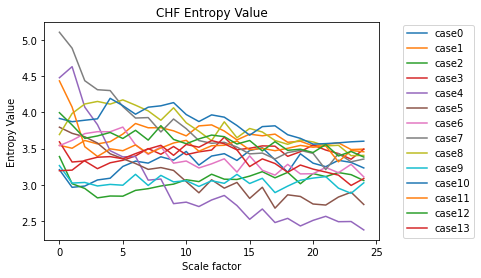

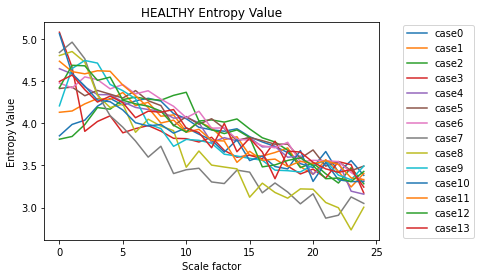

In [5]:
def getEntropy_Result(data,Entropy_method,params_dict):
    n_s = len(data) # number of subject 
    Entropy_data = pd.DataFrame()
    for i in range(n_s):
        index_name = 'case'+str(i)
        # Calculate Mutiscale Entropy Value
        Entropy_dataValue = pd.Series(Entropy_dict[Entropy_method](data[i, :],params_dict).reshape(-1))
        Entropy_data[index_name] = Entropy_dataValue
    return Entropy_data

Entropy_data0 = getEntropy_Result(data0,Entropy_method,params_dict)
Entropy_data1 = getEntropy_Result(data1,Entropy_method,params_dict)

Entropy_data0.plot()
plt.title('CHF Entropy Value')
plt.xlabel('Scale factor')
plt.ylabel('Entropy Value')
plt.legend(loc='right', bbox_to_anchor=(1.3, 0.5))
Entropy_data1.plot()
plt.title('HEALTHY Entropy Value')
plt.xlabel('Scale factor')
plt.ylabel('Entropy Value')
plt.legend(loc='right', bbox_to_anchor=(1.3, 0.5))


In [6]:
# Calculate Multiscale Entropy average value
avg_me_data0 = np.mean(Entropy_data0, axis=1)
avg_me_data1= np.mean(Entropy_data1, axis=1)
# Calculate Multiscale Entropy standard deviation value
std_me_data0 = np.std(Entropy_data0, axis=1)
std_me_data1= np.std(Entropy_data1, axis=1)

In [7]:
list(avg_me_data0)

[3.7959512001053604,
 3.68635203516561,
 3.5916005910044286,
 3.5432693786508684,
 3.5483003747422295,
 3.5339044272070574,
 3.542224258353838,
 3.483483968972626,
 3.5086226365927424,
 3.471725368472917,
 3.438465660602732,
 3.3720447675615697,
 3.4303668681122743,
 3.4461749228606573,
 3.371619509739156,
 3.340799022168258,
 3.3653330499312273,
 3.2846774570683723,
 3.2729619702750776,
 3.2867339635407045,
 3.270358627417795,
 3.2577257061417444,
 3.239279168567475,
 3.2192030513042544,
 3.1995807802591805]

In [8]:
print(Entropy_method+' P Value between CHF and HEALTHY\n')
p = np.zeros(scale)              # p-value between CHF and Healthy subjects(scale 1~25)
for index in Entropy_data0.index:
    s, p[index] = ranksums(Entropy_data0.iloc[index],Entropy_data1.iloc[index])
    print('scale',index+1,': ', p[index])

MDE P Value between CHF and HEALTHY

scale 1 :  0.0017814249006508451
scale 2 :  0.0009388667381403475
scale 3 :  9.401022586072948e-05
scale 4 :  2.8992506445686264e-05
scale 5 :  9.401022586072948e-05
scale 6 :  2.8992506445686264e-05
scale 7 :  6.402900588958174e-05
scale 8 :  7.766271463229877e-05
scale 9 :  6.402900588958174e-05
scale 10 :  0.0017814249006508451
scale 11 :  0.0006735423518489195
scale 12 :  0.0001135703929306139
scale 13 :  0.002080493251266365
scale 14 :  0.005835918878748589
scale 15 :  0.002820992942565044
scale 16 :  0.003795164066993866
scale 17 :  0.02435791571803699
scale 18 :  0.043207568601936926
scale 19 :  0.013963504288693111
scale 20 :  0.12945022416331753
scale 21 :  0.2147582230906061
scale 22 :  0.16109322449890184
scale 23 :  0.3345942595854855
scale 24 :  0.5200505273047947
scale 25 :  0.8182950537345233


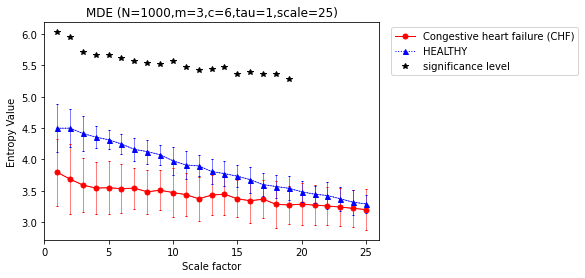

In [9]:
# figure option                                         
subject = np.array(['Congestive heart failure (CHF)', 'HEALTHY'])        # 비교군: data0 (CHF subjects), data1 (Healthy subjects)
plt_color = np.array(['red','blue'])                          # data0 plot color, data1 plot color
plt_marker = np.array(['o','^'])                              # data0 plot marker, data1 plot marker
plt_linestyle = np.array(['-',':'])                           # data0 plot linestyle, data1 plot linestyle

# figure 
Entropy = plot_Entropy(Entropy_method,
                            subject,
                            plt_color,
                            plt_marker,
                            plt_linestyle,
                            avg_me_data0,
                            avg_me_data1,
                            std_me_data0,
                            std_me_data1,
                            p,
                            params_dict)

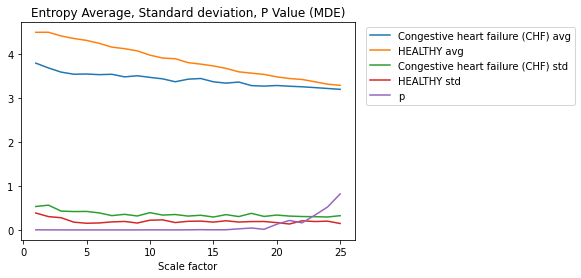

In [10]:
# plot의 x축 (scale)
x = np.arange(1,scale+1)
fig, ax = plt.subplots()
# plot의 y축 (엔트로피 평균 값, 엔트로피 표준편차 값, 엔트로피 p의 값)
ax.plot(x,avg_me_data0)      # Entropy Average Value of data0
ax.plot(x,avg_me_data1)      # Entropy Average Value of data1
ax.plot(x,std_me_data0)      # Entropy Standard deviation Value of data0
ax.plot(x,std_me_data1)      # Entropy Standard deviation Value of data1
ax.plot(x,p)                 # P Value beteween data0 and data1

plt.title('Entropy Average, Standard deviation, P Value '+'('+Entropy_method+')')
plt.xlabel('Scale factor')
plt.legend(['Congestive heart failure (CHF) avg','HEALTHY avg','Congestive heart failure (CHF) std','HEALTHY std','p'],
            loc='right', bbox_to_anchor=(1.67, 0.8))
plt.show()

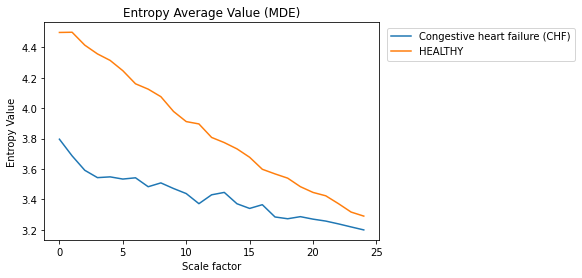

In [11]:
avg_me_data0.plot()
avg_me_data1.plot()

plt.title('Entropy Average Value '+'('+Entropy_method+')')
plt.xlabel('Scale factor')
plt.ylabel('Entropy Value')
plt.legend(['Congestive heart failure (CHF)','HEALTHY'],
            loc='right', bbox_to_anchor=(1.6, 0.9))

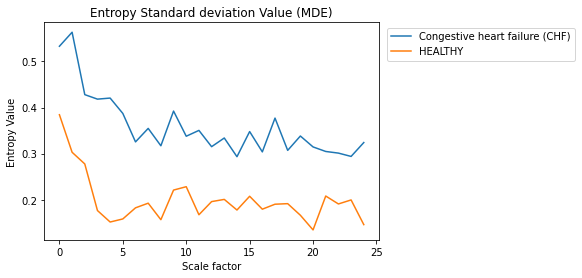

In [12]:
std_me_data0.plot()
std_me_data1.plot()

plt.title('Entropy Standard deviation Value '+'('+Entropy_method+')')
plt.xlabel('Scale factor')
plt.ylabel('Entropy Value')
plt.legend(['Congestive heart failure (CHF)','HEALTHY'],
            loc='right', bbox_to_anchor=(1.6, 0.9))

Text(0, 0.5, 'P Value')

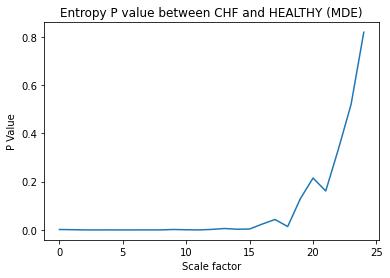

In [13]:
plt.plot(p)

plt.title('Entropy P value between CHF and HEALTHY '+'('+Entropy_method+')')
plt.xlabel('Scale factor')
plt.ylabel('P Value')


In [14]:
"""
### MCRDE 평균, 표준편차 출력 파일을 text 파일에 저장한다.
# CHF, Healthy subjects는 각각 모두 14명이다.
# MultiScale Entropy method를 통해 scale(1~25)에서의 14명의 Entropy 평균, 표준 편차를 구한다. 
# 사용한 Entropy 기법은 MultiScale Cumulative Residual Dispersion Entropy이다.
# index: scale, data: avg, std

avg_mcrde_data0_path = './results/avg_mcrde_data0.txt'     
avg_mcrde_data1_path = './results/avg_mcrde_data1.txt' 
std_mcrde_data0_path = './results/std_mcrde_data0.txt'      
std_mcrde_data1_path = './results/std_mcrde_data1.txt'  

write_txt(avg_mcrde_chf_path, avg_mcrde_healthy_path,
          std_mcrde_chf_path, std_mcrde_healthy_path,
          avg_mcrde_chf, avg_mcrde_healthy,
          std_mcrde_chf, std_mcrde_healthy )
"""

"\n### MCRDE 평균, 표준편차 출력 파일을 text 파일에 저장한다.\n# CHF, Healthy subjects는 각각 모두 14명이다.\n# MultiScale Entropy method를 통해 scale(1~25)에서의 14명의 Entropy 평균, 표준 편차를 구한다. \n# 사용한 Entropy 기법은 MultiScale Cumulative Residual Dispersion Entropy이다.\n# index: scale, data: avg, std\n\navg_mcrde_data0_path = './results/avg_mcrde_data0.txt'     \navg_mcrde_data1_path = './results/avg_mcrde_data1.txt' \nstd_mcrde_data0_path = './results/std_mcrde_data0.txt'      \nstd_mcrde_data1_path = './results/std_mcrde_data1.txt'  \n\nwrite_txt(avg_mcrde_chf_path, avg_mcrde_healthy_path,\n          std_mcrde_chf_path, std_mcrde_healthy_path,\n          avg_mcrde_chf, avg_mcrde_healthy,\n          std_mcrde_chf, std_mcrde_healthy )\n"